In [1]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
%pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import dagshub
import os
os.environ["MLFLOW_TRACKING_USERNAME"] = "subham-28"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "4b86e85660afc47e87bbde5f9785be943688b792"

In [4]:
dagshub.init(repo_owner='subham-28', repo_name='ML_Projects', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=f0fcfb17-feea-497d-91a5-2abd80e55f7f&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=81b2cb1150c016fbe4ca4a2bb06e513d57d3603f393f9ecac75aaceccc10d37f




Output()

Accessing as subham-28

Initialized MLflow to track repo "subham-28/ML_Projects"

Repository subham-28/ML_Projects initialized!

In [5]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/subham-28/ML_Projects.mlflow")

In [6]:
mlflow.set_experiment("Exp 6 - Final Estimator")

2025/06/21 06:07:23 INFO mlflow.tracking.fluent: Experiment with name 'Exp 6 - Final Estimator' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/d4a2f9b52a744a31af4f3bef6f253228', creation_time=1750486043605, experiment_id='6', last_update_time=1750486043605, lifecycle_stage='active', name='Exp 6 - Final Estimator', tags={}>

In [7]:
from sklearn import set_config
set_config(transform_output="pandas")

In [8]:
df = pd.read_csv('swiggy.csv')

In [9]:
data_clean_utils.perform_data_cleaning(df)

In [10]:
df = pd.read_csv('swiggy_cleaned.csv')

In [11]:
columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [12]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


<Axes: >

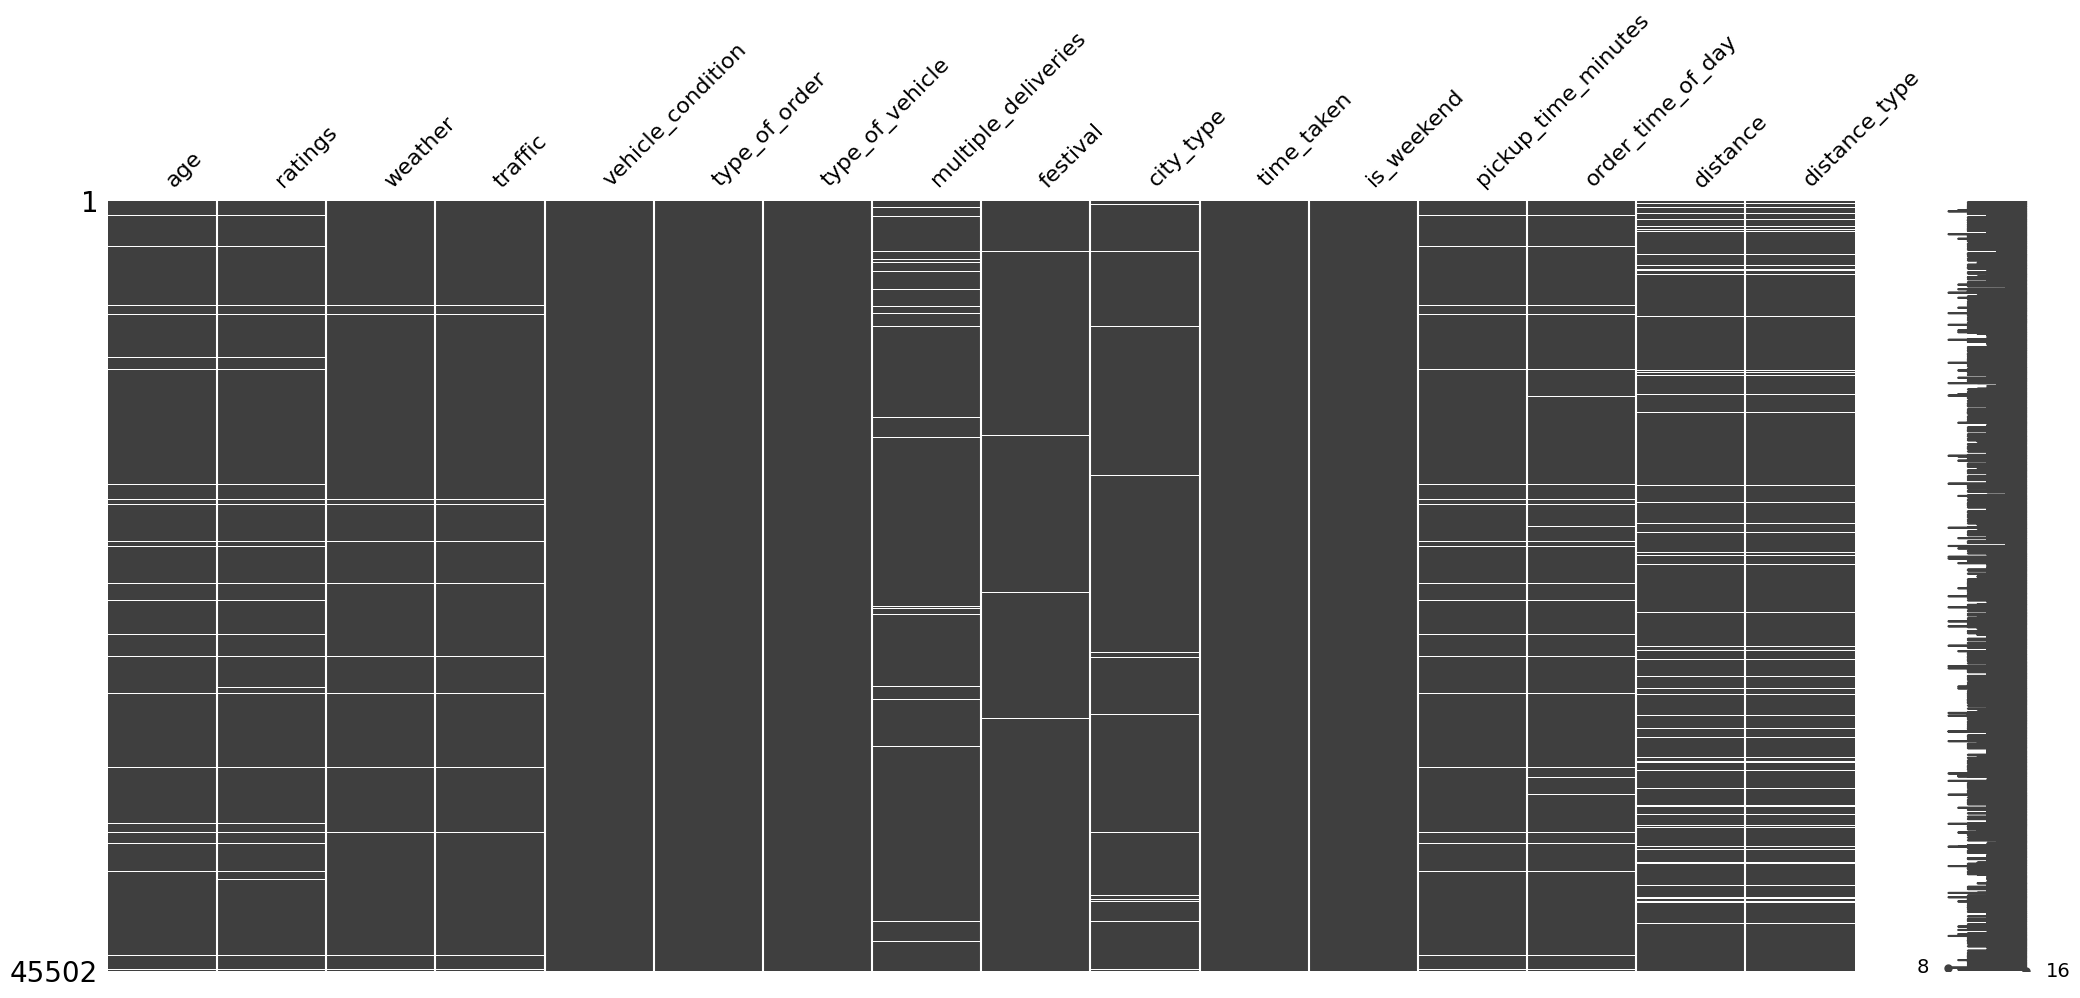

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [15]:
temp_df = df.copy().dropna()

In [16]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [19]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [20]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order','type_of_vehicle',"festival","city_type","is_weekend","order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [21]:
traffic_order = ["low","medium","high","jam"]
distance_type_order = ["short","medium","long","very_long"]

In [22]:
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [23]:
processing_pipeline = Pipeline(steps=[
                                ("preprocess",preprocessor)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [24]:
X_train_trans = processing_pipeline.fit_transform(X_train)
X_test_trans = processing_pipeline.transform(X_test)

In [25]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 28.6 MB/s eta 0:00:00


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor

In [30]:
# build the best models

best_rf_params = {'n_estimators': 201,
 'max_depth': 13,
 'max_features': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.7136902216842659}

best_lgbm_params = {'n_estimators': 39,
 'max_depth': 36,
 'learning_rate': 0.349749946044175,
 'subsample': 0.58471627276528,
 'min_child_weight': 9,
 'min_split_gain': 0.0003849322908342362,
 'reg_lambda': 44.73393398912214}

best_rf = RandomForestRegressor(**best_rf_params)
best_lgbm = LGBMRegressor(**best_lgbm_params)

lr = LinearRegression()

In [31]:
# build the stacking regressor

stacking_reg = StackingRegressor(estimators=[("rf",best_rf),
                                            ("lgbm",best_lgbm)],
                                final_estimator=lr,
                                cv=5,n_jobs=-1)

# build transformed regressor

model = TransformedTargetRegressor(regressor=stacking_reg,
                                    transformer=pt)

# train the model
model.fit(X_train_trans,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PowerTransformer was fitted without feature names
  warnings.warn(


TransformedTargetRegressor(regressor=StackingRegressor(cv=5,
                                                       estimators=[('rf',
                                                                    RandomForestRegressor(max_depth=13,
                                                                                          max_features=None,
                                                                                          max_samples=0.7136902216842659,
                                                                                          n_estimators=201)),
                                                                   ('lgbm',
                                                                    LGBMRegressor(learning_rate=0.349749946044175,
                                                                                  max_depth=36,
                                                                                  min_child_weight=9,
                                                                                  min_split_gain=0.0003849322908342362,
                                                                                  n_estimators=39,
                                                                                  reg_lambda=44.73393398912214,
                                                                                  subsample=0.58471627276528))],
                                                       final_estimator=LinearRegression(),
                                                       n_jobs=-1),
                           transformer=PowerTransformer())

In [32]:
# get the train and test predictions

y_train_pred = model.predict(X_train_trans)
y_test_pred = model.predict(X_test_trans)

# calculate the train and test mae

train_mae = mean_absolute_error(y_train,y_train_pred)
test_mae = mean_absolute_error(y_test,y_test_pred)

# calculate the r2 scores

train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

# calculate cross val scores

cv_scores = cross_val_score(model,
                            X_train_trans,
                            y_train,cv=3,
                            scoring="neg_mean_absolute_error",
                            n_jobs=-1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
-cv_scores

array([3.07071101, 3.08305562, 3.05875265])

In [37]:
# log with mlflow
import joblib

with mlflow.start_run():
    # set tags
    mlflow.set_tag("model","stacking regressor")

    # log parameters
    # Log parameters of the underlying regressor within TransformedTargetRegressor
    mlflow.log_params(model.regressor.get_params())

    # log metrics
    mlflow.log_metric("train_mae",train_mae)
    mlflow.log_metric("test_mae",test_mae)
    mlflow.log_metric("train_r2",train_r2)
    mlflow.log_metric("test_r2",test_r2)
    mlflow.log_metric("cv_score",-(cv_scores.mean()))

    joblib.dump(model, "model.pkl")

🏃 View run stately-steed-38 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/6/runs/1e0797c50cfe40efbe6aad0479f78f98
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/6
